In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
from scipy.special import ndtri

filename = 'Metazygia wittfeldae Monitor 1 activity_DD_binary_run_duration'
filename2 = "Metazygia wittfeldae Monitor 1 activity_DD_reindex_binary_run_duration"
df = pd.read_csv(filename + '.csv', index_col = 0)
df1 = df['s6']
resampled_df = pd.read_csv(filename2 + '.csv', index_col = 0)
df2 = resampled_df['s6']

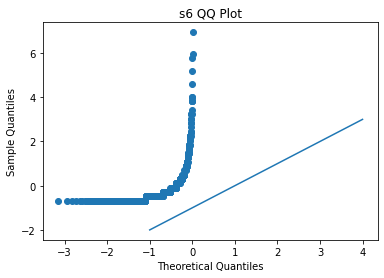

In [60]:
df1 = df1.sort_values(ascending = True).reset_index()
df1['count'] = df1.index + 1
df1.head()

def create_qq_plot(col):
    n_rows = df1.shape[0]
    df1['percentile_area'] = (df1['count'])/n_rows
    df1['z_theoretical'] = ndtri(df1['percentile_area'])
    df1['z_actual'] = (df1[col] - df1[col].mean())/df1[col].std(ddof = 0)
    #display(df1)
    plt.scatter(df1.z_theoretical, df1.z_actual)
    plt.plot([-1, 0, 1, 2, 3, 4], [-2, -1, 0, 1, 2, 3])
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')
    plt.title(col + ' QQ Plot')
    
create_qq_plot('s6')

/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


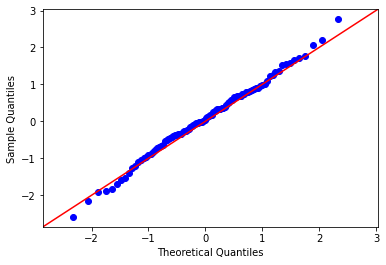

In [2]:
datapoints = np.random.normal(0, 1, 100)
sm.qqplot(datapoints, line = '45')
py.show()

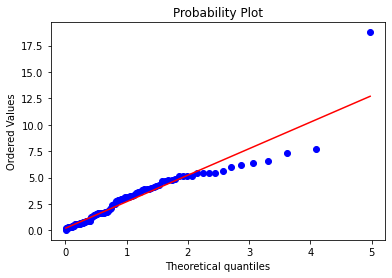

In [15]:
datapoints = np.random.exponential(scale = 3, size = 100)
stats.probplot(datapoints, dist = 'expon', plot = plt)
py.show()

/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


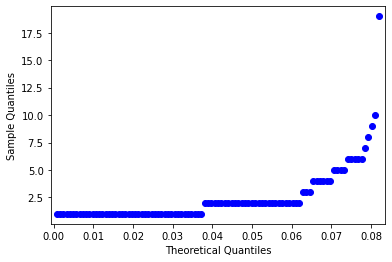

In [35]:
spiderdata = df1.to_numpy()
sm.qqplot(spiderdata, dist = stats.expon, line = "q")
plt.show()

/Users/alexispark/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


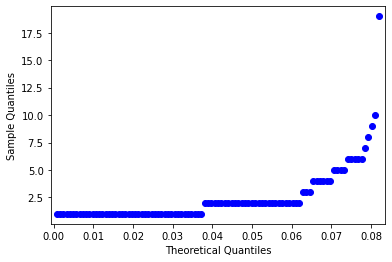

In [42]:
spiderdata = df1.to_numpy()
spiderdatasorted = np.sort(spiderdata)

sm.qqplot(spiderdatasorted, dist = stats.expon, line = "q")
plt.show()

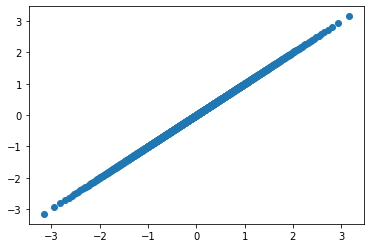

In [55]:
plt.scatter(df1.z_theoretical, df1.z_theoretical)
plt.plot([-2, -1, 0, 1, 2], [-2, -1, 0, 1, 2])